<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. ✔️
- Normalize the data (all features should have roughly the same scale) ✔️
- Import the type of model and layers that you will need from Keras. ✔️
- Instantiate a model object and use `model.add()` to add layers to your model ✔️
- Since this is a regression model you will have a single output node in the final layer. ✔️
- Use activation functions that are appropriate for this task ✔️
- Compile your model ✔️
- Fit your model and report its accuracy in terms of Mean Squared Error ✔️
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. ✔️
- Run this same data through a linear regression model. Which achieves higher accuracy? ✔️ **- The Linear Regression Model Achieved Higher Accuracy**
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs) ✔️
- After feature engineering, which model sees a greater accuracy boost due to the new features? ✔️ **-The Linear Regression Model will continue to achieve higher accuracy, unless I take hyperparameter tuning to an extreme within the neural network, as housing prices are more linear, whereas the magic of neural networks is seen in their ability to work with nonlinear data because of the insane level of hyperparameters**

In [1]:
# Load in the boston housing data and train-test-split
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print('Train Shapes:')
print(f'X: {X_train.shape}')
print(f'y: {y_train.shape}')

print()

print('Test Shapes:')
print(f'X: {X_test.shape}')
print(f'y: {y_test.shape}')

Train Shapes:
X: (404, 13)
y: (404,)

Test Shapes:
X: (102, 13)
y: (102,)


In [2]:
from sklearn.preprocessing import StandardScaler

# Normalize our data to be on the same scale
scaler = StandardScaler()  # Instantiate our scaler
scaler.fit(X_train)  # Fit

# Transform / redefine X_train/X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (404, 13)
X_test shape: (102, 13)


In [0]:
from tensorflow.keras.models import Sequential  # Our model
from tensorflow.keras.layers import Dense  # For our layers.


model1 = Sequential()  # Instantiate the model

# Adding six total layers. Using rectified linear units until our output layer, where we will use sigmoid.
# This is where we are actually building the model.

# DS13 - Sharpened this up, stretch goals are what I've been doing as stretch goals all week, so I'm sharpening up code, commenting, etc. :P
model1.add(Dense(50, activation='relu', input_dim=X_train.shape[1], name='InputLayer'))
model1.add(Dense(25, activation='relu', name='Hidden1'))
model1.add(Dense(15, activation='relu', name='Hidden2'))
model1.add(Dense(5, activation='relu', name='Hidden3'))
model1.add(Dense(3, activation='relu', name='Hidden4'))
model1.add(Dense(1, activation='sigmoid', name='OutputLayer'))

model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])  # Compile our model.

model1fit = model1.fit(X_train, y_train, epochs=250, verbose=False)  # Fit our model to training data, 250 iterations / epochs

In [4]:
score1 = model1.evaluate(X_test, y_test, verbose=False)
print(f'MSE for Neural Network: {score1[1]}')

MSE for Neural Network: 570.7011108398438


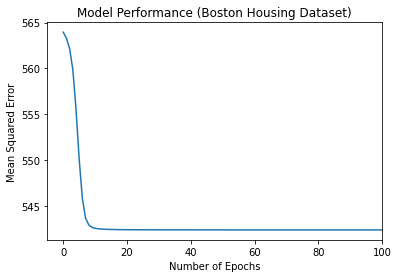

In [5]:
# We're going to plot our model performance based upon our metric + number of epochs.

import matplotlib.pyplot as plt

plt.plot(model1fit.history['mean_squared_error'])
plt.title('Model Performance (Boston Housing Dataset)')
plt.xlabel('Number of Epochs')
plt.ylabel('Mean Squared Error')
plt.xlim(-5, 100)
plt.show();

In [6]:
# Let's do it again, this time with linear regression.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()  # Instantiate

linreg.fit(X_train, y_train)  # Fit the Model
y_pred = linreg.predict(X_test)  # Make Predictions

print(f'MSE for Linear Regression: {mean_squared_error(y_test, y_pred)}')  # Evaluate our model.

MSE for Linear Regression: 23.195599256423


In [7]:
import pandas as pd
import numpy as np

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# Normalize our data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Send to dataframe for ease in removing biased column (feature engineering)
X_train = pd.DataFrame.from_dict(X_train)
X_test = pd.DataFrame.from_dict(X_test)

X_train.shape, X_test.shape

((404, 13), (102, 13))

In [8]:
# Column #11 is racial bias, I'm going to remove that.  B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town


X_train = X_train.drop(columns=11)
X_test = X_test.drop(columns=11)

X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,12
0,-0.272246,-0.483615,-0.435762,-0.256833,-0.165227,-0.176443,0.813062,0.116698,-0.626249,-0.595170,1.148500,0.825220
1,-0.403427,2.991784,-1.333912,-0.256833,-1.215182,1.894346,-1.910361,1.247585,-0.856463,-0.348433,-1.718189,-1.329202
2,0.124940,-0.483615,1.028326,-0.256833,0.628642,-1.829688,1.110488,-1.187439,1.675886,1.565287,0.784476,-1.308500
3,-0.401494,-0.483615,-0.869402,-0.256833,-0.361560,-0.324558,-1.236672,1.107180,-0.511142,-1.094663,0.784476,-0.652926
4,-0.005634,-0.483615,1.028326,-0.256833,1.328612,0.153642,0.694808,-0.578572,1.675886,1.565287,0.784476,0.263497


In [0]:
model2 = Sequential()  # Instantiate the model

# Adding six total layers. Using rectified linear units until our output layer, where we will use sigmoid.
# This is where we are actually building the model.

model2.add(Dense(50, activation='relu', input_dim=X_train.shape[1], name='InputLayer'))
model2.add(Dense(25, activation='relu', name='Hidden1'))
model2.add(Dense(15, activation='relu', name='Hidden2'))
model2.add(Dense(1, activation='sigmoid', name='OutputLayer'))

model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])  # Compile our model.

model2.fit(X_train.values, y_train, epochs=250, verbose=False)  # Fit our model to training data, 250 iterations / epochs
model2results = model2.evaluate(X_test.values, y_test, verbose=False)

# Remember to use .values if in a pandas DataFrame!

In [10]:
linreg = LinearRegression()  # Instantiate

linreg.fit(X_train, y_train)  # Fit the Model
y_pred = linreg.predict(X_test)  # Make Predictions

print(f'MSE for Linear Regression: {mean_squared_error(y_test, y_pred)}')  # Evaluate our model.
print(f'New Neural Network MSE: {model2results[1]}')

MSE for Linear Regression: 23.927224586760065
New Neural Network MSE: 570.7011108398438


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class. ✔️
- Make sure to one-hot encode your category labels ✔️
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST. ✔️
- Try different hyperparameters. What is the highest accuracy that you are able to achieve. ✔️
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. ✔️
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results. ✔️

In [11]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Train Shapes:')
print(f'X: {X_train.shape}')
print(f'y: {y_train.shape}')

print()

print('Test Shapes:')
print(f'X: {X_test.shape}')
print(f'y: {y_test.shape}')

Train Shapes:
X: (60000, 28, 28)
y: (60000,)

Test Shapes:
X: (10000, 28, 28)
y: (10000,)


In [12]:
from tensorflow import keras

# Defining number of classes (15)
num_classes = 15

# Define image pixel sizes
img_rows = 28
img_cols = 28

# Reshape our data.
X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols)

# X Variable Types
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Categorical encoding on targets
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(f'X_train Shape: {X_train.shape}')
print(f'X_test Shape: {X_test.shape}')

X_train Shape: (60000, 784)
X_test Shape: (10000, 784)


In [0]:
import datetime
import os
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping  # For regularization 
from tensorflow.keras.layers import Dropout, Flatten


logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))  # Log directory
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1) # Our callback
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=10)  # Monitoring by val_accuracy, minimum improvement 0.01, stop if no improvement after 10 epochs


model2 = Sequential()

model2.add(Flatten(name='FlattenLayer'))
model2.add(Dense(75, activation='relu', input_dim=X_train.shape[1], name='Input'))
model2.add(Dropout(0.2, name='FirstDropout'))  # Dropout layer, can be tuned
model2.add(Dense(50, activation='relu', name='HiddenLayer1'))
model2.add(Dropout(0.2, name='SecondDropout'))  # Dropout layer
model2.add(Dense(40, activation='relu', name='HiddenLayer2'))
model2.add(Dropout(0.2, name='ThirdDropout')) # Dropout layer
model2.add(Dense(15, activation='softmax', name='OutputLayer'))  # Softmax - multi-class classification

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2fit = model2.fit(X_train, y_train, validation_split=0.2,  # Doing a validation split of 20%
                       epochs=250, callbacks=[tensorboard_callback, stop],  # EarlyStopping / tensorboard callbacks
                       verbose=False)
score2 = model2.evaluate(X_test, y_test, verbose=False)

In [14]:
print(f'Accuracy for Fashion-MNIST Dataset: {score2[1]}')

Accuracy for Fashion-MNIST Dataset: 0.8700000047683716


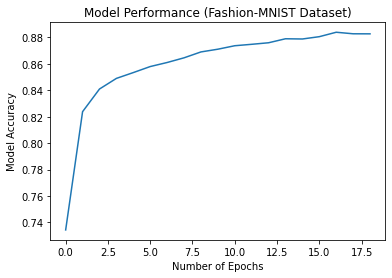

In [15]:
# Plotting epochs / accuracy

plt.plot(model2fit.history['accuracy'])
plt.title('Model Performance (Fashion-MNIST Dataset)')
plt.xlabel('Number of Epochs')
plt.ylabel('Model Accuracy')
plt.show();

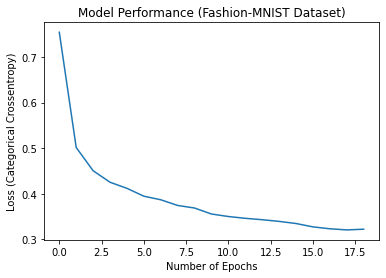

In [16]:
# Plotting epochs / loss

plt.plot(model2fit.history['loss'])
plt.title('Model Performance (Fashion-MNIST Dataset)')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss (Categorical Crossentropy)')
plt.show();

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.